# Top 4 Python libraries for technical analysis

## Setup

In [1]:
%config InlineBackend.figure_format = "retina"

In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

import talib
import ta
import pandas_ta as pta
from finta import TA

plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = [14, 8]

## Data

[*********************100%***********************]  1 of 1 completed


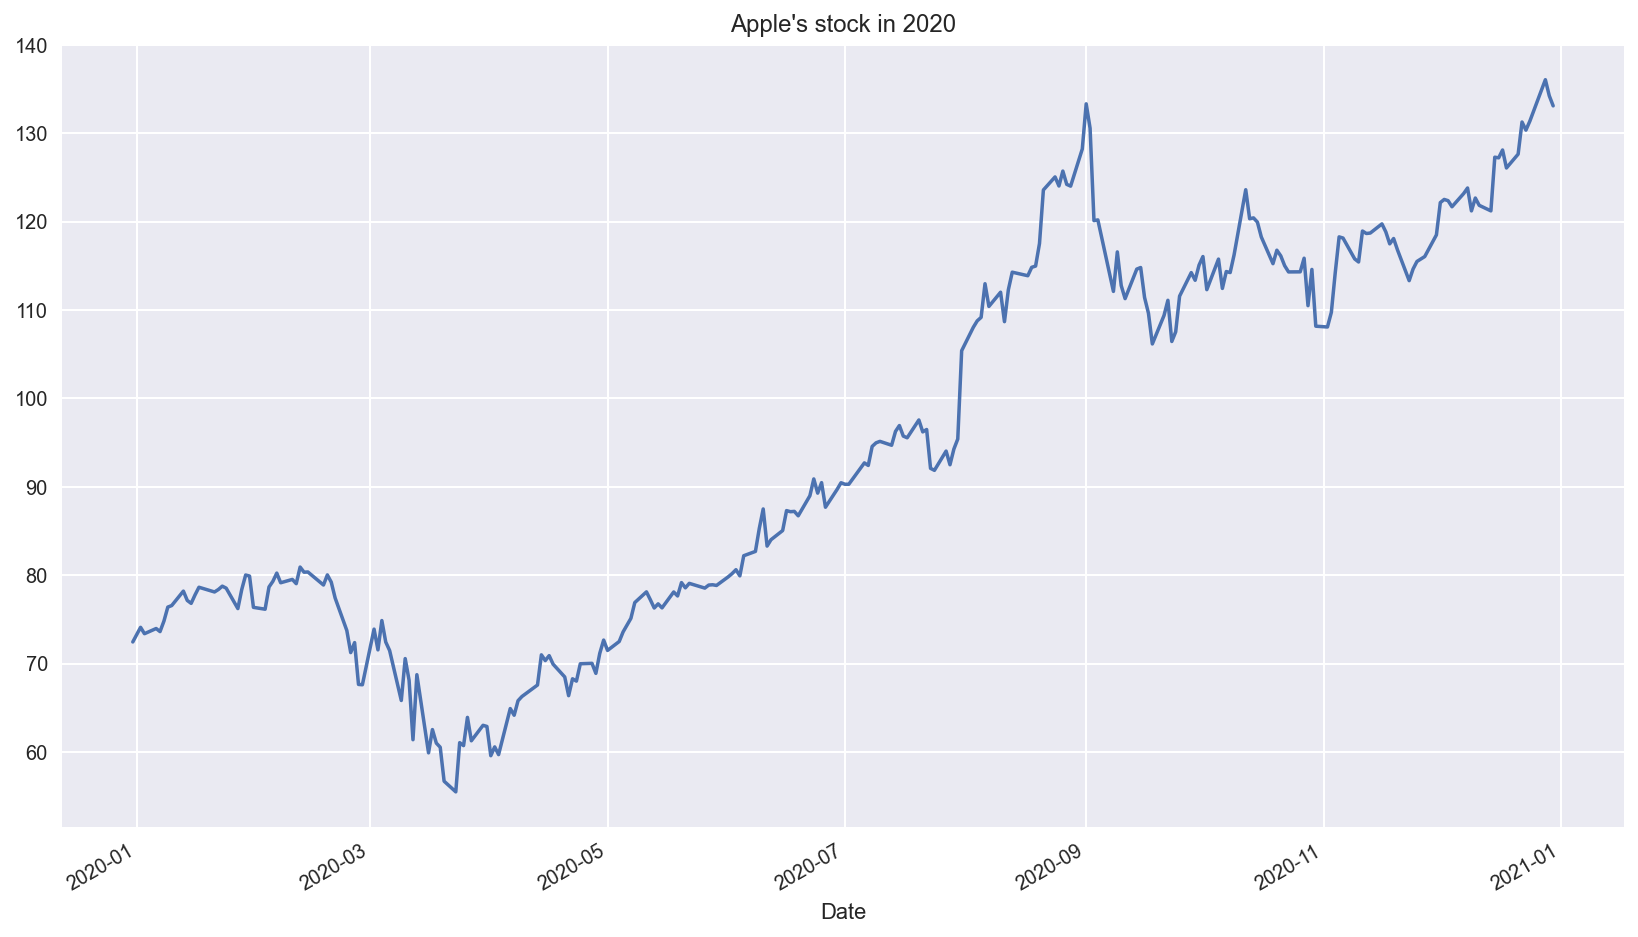

In [3]:
df = yf.download("AAPL", 
                 start="2020-01-01", 
                 end="2020-12-31")

df["Adj Close"].plot(title="Apple's stock in 2020");

## Technical analysis libraries

### 1. TA-lib

In [4]:
help(talib.BBANDS)

Help on function BBANDS in module talib._ta_lib:

BBANDS(...)
    BBANDS(real[, timeperiod=?, nbdevup=?, nbdevdn=?, matype=?])
    
    Bollinger Bands (Overlap Studies)
    
    Inputs:
        real: (any ndarray)
    Parameters:
        timeperiod: 5
        nbdevup: 2
        nbdevdn: 2
        matype: 0 (Simple Moving Average)
    Outputs:
        upperband
        middleband
        lowerband



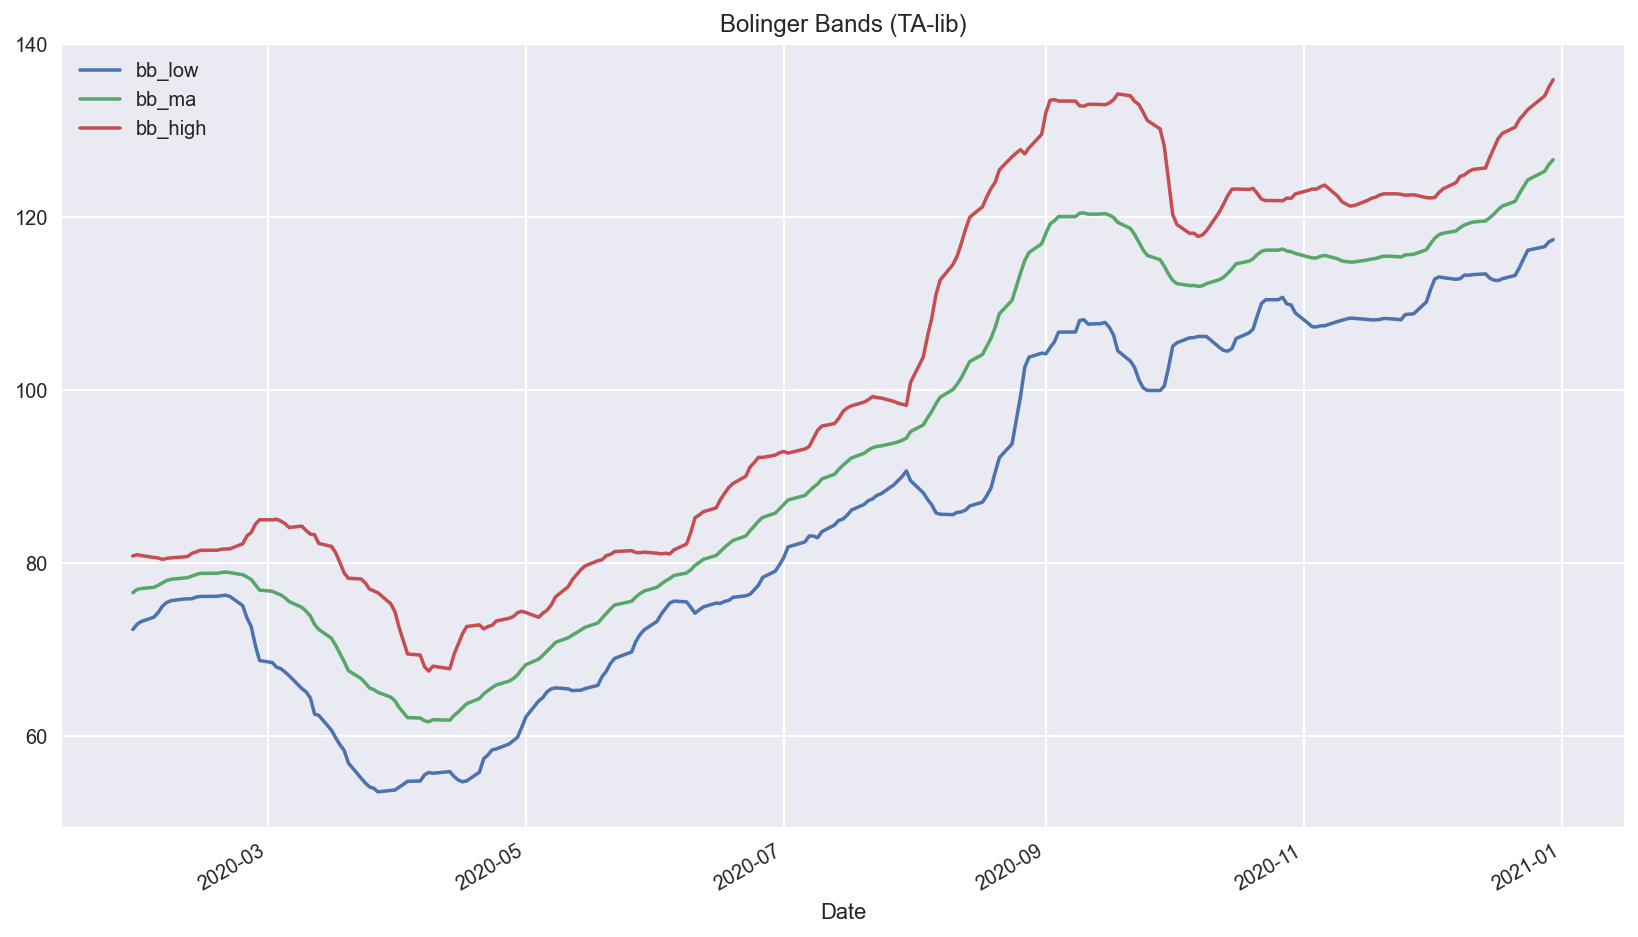

In [5]:
upper, middle, lower = talib.BBANDS(df["Adj Close"], timeperiod=20)
bbands_talib = pd.DataFrame(index=df.index,
                            data={"bb_low": lower,
                                  "bb_ma": middle,
                                  "bb_high": upper})
bbands_talib.plot(title="Bolinger Bands (TA-lib)");


### 2. ta

In [6]:
help(ta.volatility.BollingerBands)

Help on class BollingerBands in module ta.volatility:

class BollingerBands(ta.utils.IndicatorMixin)
 |  BollingerBands(close: pandas.core.series.Series, window: int = 20, window_dev: int = 2, fillna: bool = False)
 |  
 |  Bollinger Bands
 |  
 |  https://school.stockcharts.com/doku.php?id=technical_indicators:bollinger_bands
 |  
 |  Args:
 |      close(pandas.Series): dataset 'Close' column.
 |      window(int): n period.
 |      window_dev(int): n factor standard deviation
 |      fillna(bool): if True, fill nan values.
 |  
 |  Method resolution order:
 |      BollingerBands
 |      ta.utils.IndicatorMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, close: pandas.core.series.Series, window: int = 20, window_dev: int = 2, fillna: bool = False)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  bollinger_hband(self) -> pandas.core.series.Series
 |      Bollinger Channel High Band
 |      
 |      Returns:
 |          pa

In [7]:
# instantiate the indicator
ta_bbands = ta.volatility.BollingerBands(close=df["Adj Close"], 
                                         window=20, 
                                         window_dev=2)

# copy as we will be adding to it temporarily
ta_df = df.copy()

# add Bollinger Bands
ta_df["bb_ma"] = ta_bbands.bollinger_mavg()
ta_df["bb_high"] = ta_bbands.bollinger_hband()
ta_df["bb_low"] = ta_bbands.bollinger_lband()

# add Bollinger Bands low/high indicator
ta_df["bb_high_ind"] = ta_bbands.bollinger_hband_indicator()
ta_df["bb_low_ind"] = ta_bbands.bollinger_lband_indicator()

# add additional measures
ta_df["bb_width"] = ta_bbands.bollinger_wband()
ta_df["bb_pct"] = ta_bbands.bollinger_pband()

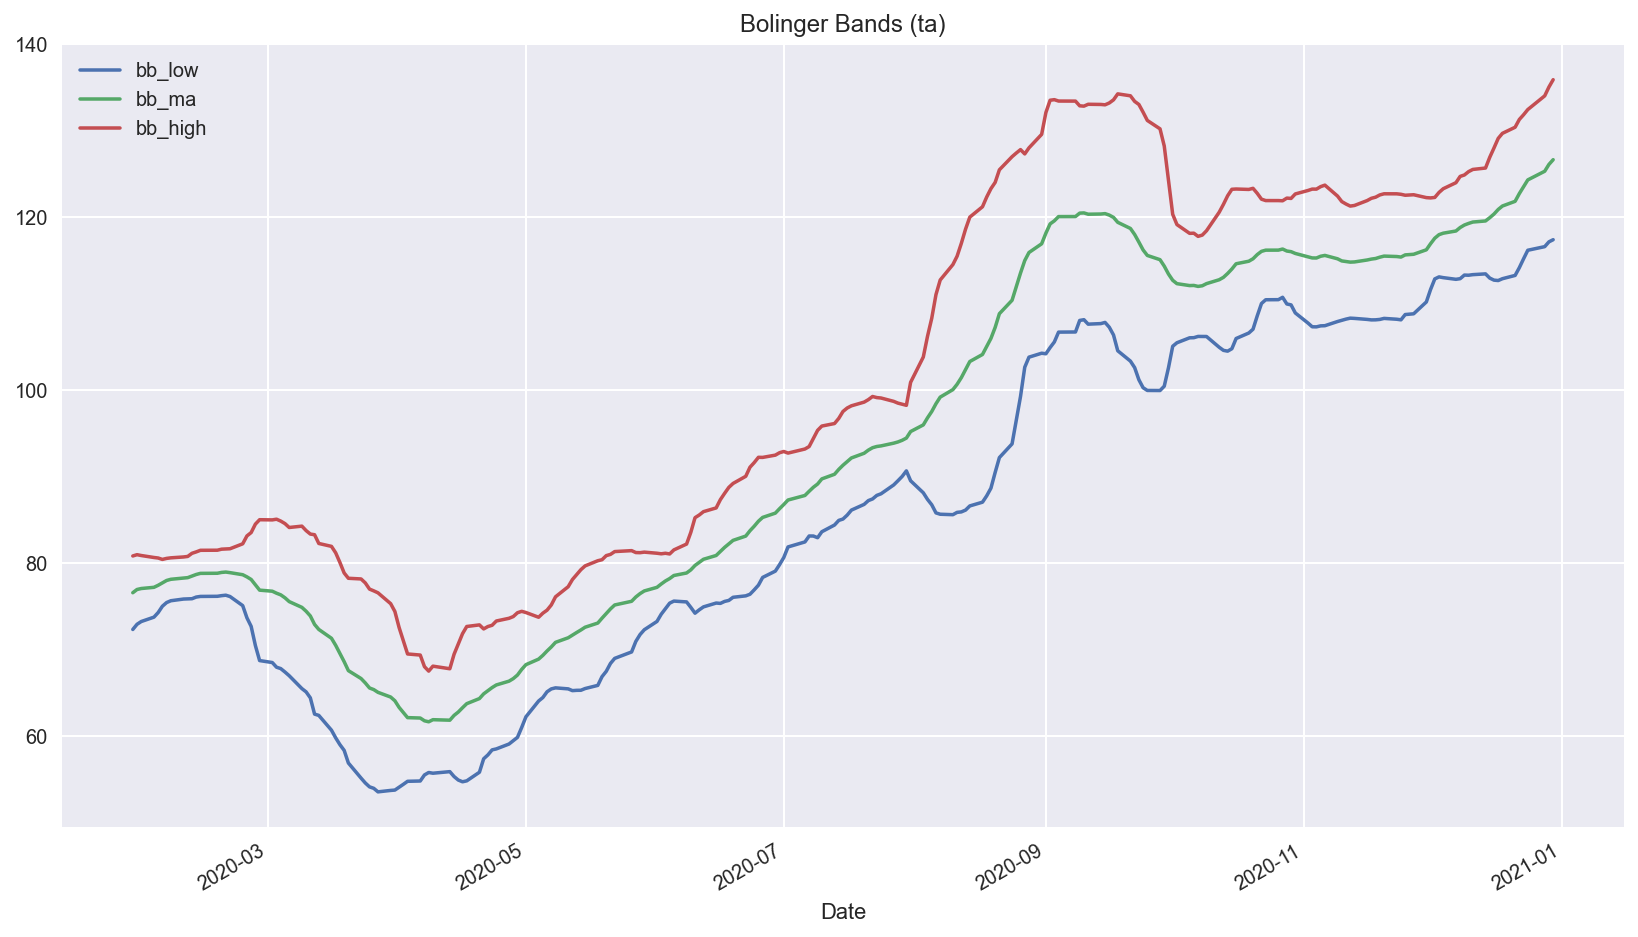

In [8]:
ta_df[["bb_low", "bb_ma", "bb_high"]].plot(title="Bolinger Bands (ta)");

In [9]:
ta_df

,Open,High,Low,Close,Adj Close,Volume,bb_ma,bb_high,bb_low,bb_high_ind,bb_low_ind,bb_width,bb_pct
Date,,,,,,,,,,,,,
2019-12-31,72.482498,73.419998,72.379997,73.412498,72.443565,100805600,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2020-01-02,74.059998,75.150002,73.797501,75.087502,74.096458,135480400,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2020-01-03,74.287498,75.144997,74.125000,74.357498,73.376091,146322800,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.960777,118387200,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.612923,108872000,NaN,NaN,NaN,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,132.160004,132.429993,130.779999,130.960007,130.347565,88223700,123.525618,131.849667,115.201568,0.0,0.0,13.477446,0.909773
2020-12-24,131.320007,133.460007,131.100006,131.970001,131.352844,54930100,124.318891,132.449273,116.188509,0.0,0.0,13.079882,0.932572
2020-12-28,133.990005,137.339996,133.509995,136.690002,136.050781,124486200,125.319192,134.033313,116.605070,1.0,0.0,13.907082,1.115759


In [10]:
# add all available TA indicators
ta_all_indicators_df = ta.add_all_ta_features(df, open="Open", high="High", 
                                              low="Low", close="Close", 
                                              volume="Volume")

ta_all_indicators_df.shape

/opt/homebrew/Caskroom/miniforge/base/envs/medium/lib/python3.8/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/opt/homebrew/Caskroom/miniforge/base/envs/medium/lib/python3.8/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


(253, 89)

### 3. pandas_ta

In [11]:
help(pta.bbands)

Help on function bbands in module pandas_ta.volatility.bbands:

bbands(close, length=None, std=None, ddof=0, mamode=None, talib=None, offset=None, **kwargs)
    Bollinger Bands (BBANDS)
    
    A popular volatility indicator by John Bollinger.
    
    Sources:
        https://www.tradingview.com/wiki/Bollinger_Bands_(BB)
    
    Calculation:
        Default Inputs:
            length=5, std=2, mamode="sma", ddof=0
        EMA = Exponential Moving Average
        SMA = Simple Moving Average
        STDEV = Standard Deviation
        stdev = STDEV(close, length, ddof)
        if "ema":
            MID = EMA(close, length)
        else:
            MID = SMA(close, length)
    
        LOWER = MID - std * stdev
        UPPER = MID + std * stdev
    
        BANDWIDTH = 100 * (UPPER - LOWER) / MID
        PERCENT = (close - LOWER) / (UPPER - LOWER)
    
    Args:
        close (pd.Series): Series of 'close's
        length (int): The short period. Default: 5
        std (int): The long 

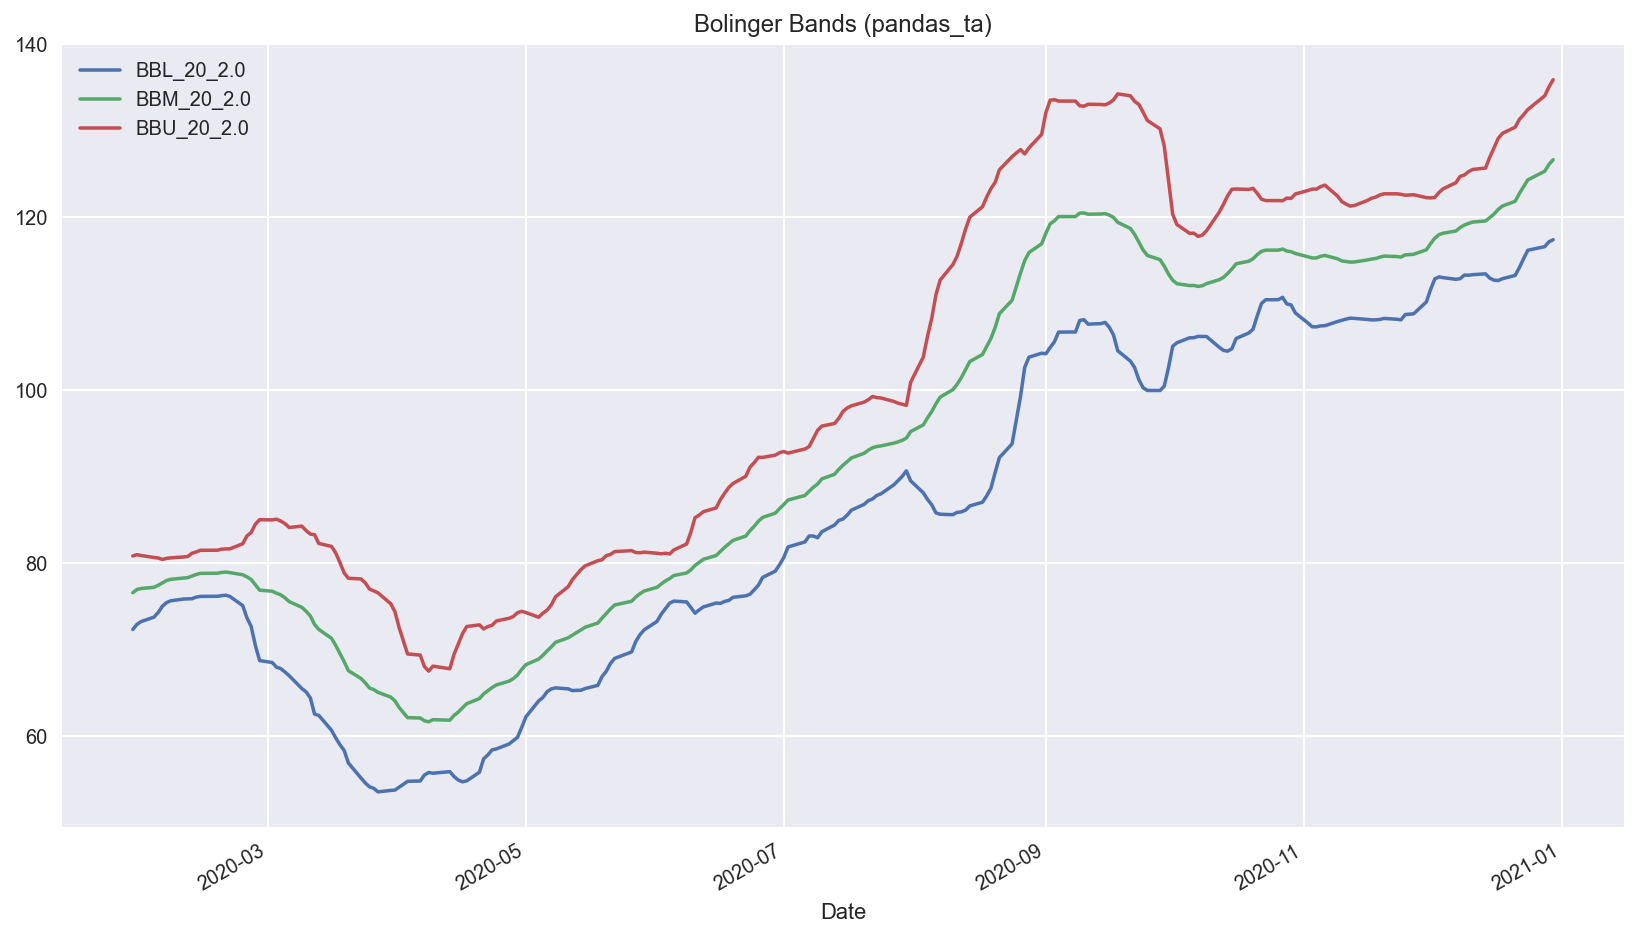

In [12]:
pta_df = pta.bbands(df["Adj Close"], length=20, talib=False)
(
    pta_df[["BBL_20_2.0", "BBM_20_2.0", "BBU_20_2.0"]]
    .plot(title="Bolinger Bands (pandas_ta)")
);

### 4. FinTA

In [13]:
help(TA)

Help on class TA in module finta.finta:

class TA(builtins.object)
 |  Methods defined here:
 |  
 |  ADL(cls, ohlcv: pandas.core.frame.DataFrame) -> pandas.core.series.Series
 |      The accumulation/distribution line was created by Marc Chaikin to determine the flow of money into or out of a security.
 |      It should not be confused with the advance/decline line. While their initials might be the same, these are entirely different indicators,
 |      and their uses are different as well. Whereas the advance/decline line can provide insight into market movements,
 |      the accumulation/distribution line is of use to traders looking to measure buy/sell pressure on a security or confirm the strength of a trend.
 |  
 |  ADX(ohlc: pandas.core.frame.DataFrame, period: int = 14, adjust: bool = True) -> pandas.core.series.Series
 |      The A.D.X. is 100 * smoothed moving average of absolute value (DMI +/-) divided by (DMI+ + DMI-). ADX does not indicate trend direction or momentum,
 | 

In [14]:
help(TA.BBANDS)

Help on function BBANDS in module finta.finta:

BBANDS(ohlc: pandas.core.frame.DataFrame, period: int = 20, MA: pandas.core.series.Series = None, column: str = 'close', std_multiplier: float = 2) -> pandas.core.frame.DataFrame
    Developed by John Bollinger, Bollinger Bands® are volatility bands placed above and below a moving average.
    Volatility is based on the standard deviation, which changes as volatility increases and decreases.
    The bands automatically widen when volatility increases and narrow when volatility decreases.
    
    This method allows input of some other form of moving average like EMA or KAMA around which BBAND will be formed.
    Pass desired moving average as <MA> argument. For example BBANDS(MA=TA.KAMA(20)).



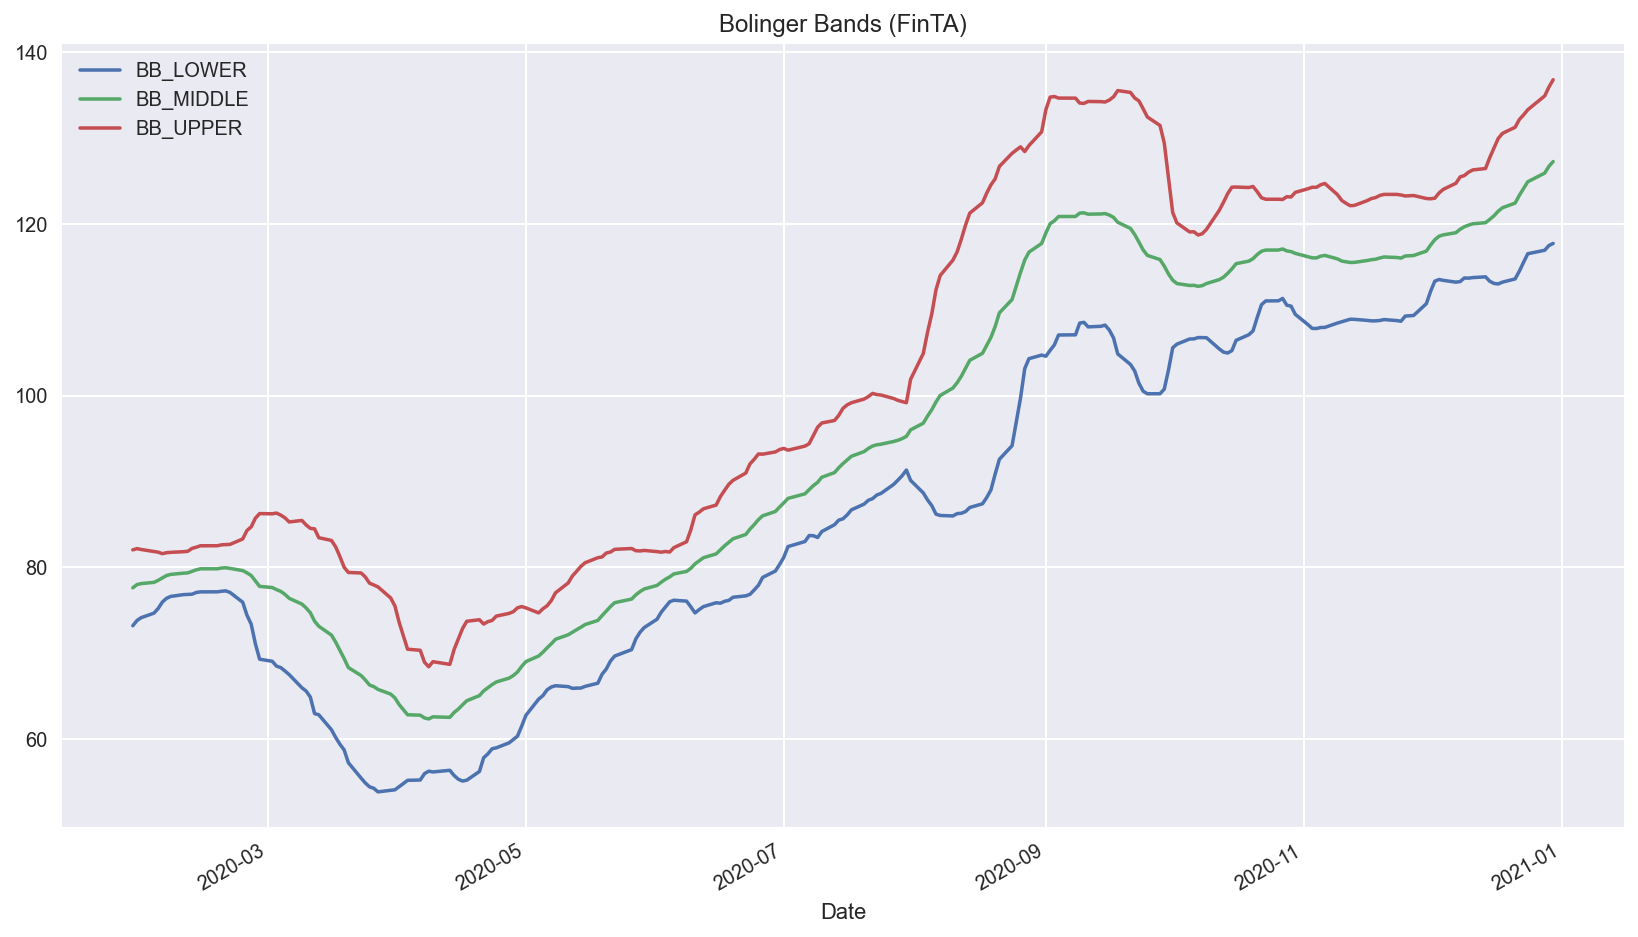

In [15]:
finta_df = TA.BBANDS(df)
(
    finta_df[["BB_LOWER", "BB_MIDDLE", "BB_UPPER"]]
    .plot(title="Bolinger Bands (FinTA)")
);